<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Regresión logística, hiperparámetros y regularización</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Regresión Logística (Logistic Regression)

- **Contexto**: Intentemos utilizar la regresión lineal como un clasificador

In [18]:
from sklearn.datasets import load_breast_cancer

# Set de datos sobre datos de cancer de mamas en Wisconsin 
# Objetivo: clasificación de tumores benignos y malignos
br_cancer = load_breast_cancer()
print('Características', br_cancer.feature_names)
# Originalmente 0 es maligno y 1 es benigno. Lo invertiremos
print('Target', br_cancer.target_names[::-1]) 


Características ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target ['benign' 'malignant']


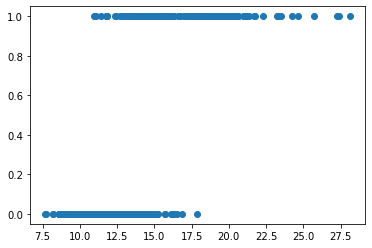

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = br_cancer.data[:, 0].reshape(-1,1) # mean_radius
y = 1 - br_cancer.target # Nuevamente inversión maligno/benigno 0/1

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

plt.scatter(X_train, y_train)
plt.show()

Intercepto: -1.0154354797965857
Coeficientes: [0.09823629]


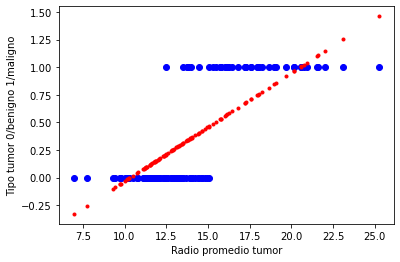

In [64]:
# Ajustando modelo de regresión lineal

from sklearn.linear_model import LinearRegression

# Entrenamiento regresor lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercepto:', lin_reg.intercept_, )
print('Coeficientes:', lin_reg.coef_ )

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
plt.plot(X_test, lin_reg.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

- Regresión lineal simplemente hace regresión sobre los datos. ¿Cómo podemos clasificar usando este modelo? 
    - R: *umbral*
    
\begin{align}
    \hat{y}=\left\{
    \begin{array}{ll}
      0, & \mbox{si $\hat{p} <0.5$}.\\
      1, & \mbox{si $\hat{p} \geq0.5$}.
    \end{array}
  \right.
\end{align}

donde $\hat{p}$ es el valor predicho por el regresor lineal e $\hat{y}$ es la clase predicha. En este ejemplo, escogeremos el umbral en 0.5 para clasificación
- Problema: ¿Cómo interpretamos los valores de la regresión lineal? por ejemplo  $\hat{p}=-0.25$
- La regresión logística hace la regresión lineal **interpretable**

### Regresión logística

- A pesar de hacer regresión, se utiliza normalmente para clasificación
- Permite darle una interpretación a los valores obtenidos por la regresión: Probabilidad de pertenecer a cierta clase
- Ecuación de función logística

$$ \sigma(t) = \frac{1}{1+e^{-t}}$$

<img src='images/logisticFunction.png' width=600>

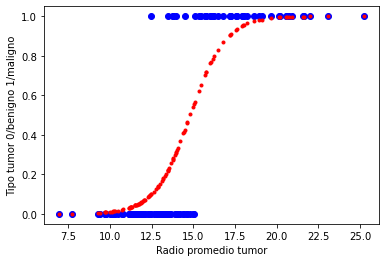

In [47]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
# Ojo, predict retorna a qué clase pertenece
# Para obtener las probabilidades, se debe utilizar método predict_proba de LogisticRegression
plt.plot(X_test, log_reg.predict_proba(X_test)[:,1],'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

# Regresión Ridge

- Agrega una penalización a parámetros $\theta$ de regresión lineal para evitar overfitting.
- Penalización está definida por parámetro $\alpha$. A mayor $\alpha$, menores deben ser los valores de $\theta$ para compensar.
- También se puede utilizar como clasificador

Intercepto: -1.0154354797965859
Coeficientes: [0.09823629]


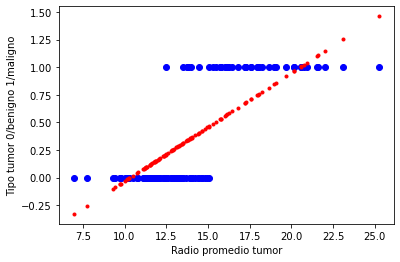

In [74]:
from sklearn.linear_model import Ridge

rid_clf = Ridge(alpha=0)
rid_clf.fit(X_train, y_train)

print('Intercepto:', rid_clf.intercept_, )
print('Coeficientes:', rid_clf.coef_ )

plt.plot(X_test, y_test,'bo')
plt.plot(X_test, rid_clf.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

# Clasificación multiclase

- Hasta ahora hemos estudiado clasificadores binarios: solo son capaces de distinguir entre dos clases.
- Es posible extender algoritmos binarios para poder identificar múltiples clases
- Estrategias:
    - Uno contra Todos (One versus All/One versus the Rest) (OvA/OvR)
    - Uno contra Uno (One versus One) (OvO)

In [90]:
# Usando dataset MNIST para clasificación multiclase
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')
log_reg.fit(X_train, y_train)

print('Accuracy test: ', log_reg.score(X_test,y_test))

Accuracy test:  0.9611111111111111


In [111]:
print('Valores reales', y_test)
print('Predicciones:',log_reg.predict(X_test))

Valores reales [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Predicciones: [6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 

Valor real 4
Predicción [4]


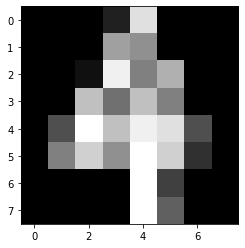

In [113]:
# Ejemplos de predicciones
i = 20
#i = 11

image = X_test[i].reshape(8,8)
plt.imshow(image,cmap='gray')
print('Valor real', y_test[i])
print('Predicción', log_reg.predict(X_test[i].reshape(1,-1)))

# Curvas ROC

## Contexto: recordatorios

- **True Positive Rate** (sensibilidad)

$$ TPR = \frac{TP}{TP + FN}$$

- **True Negative Rate** (especificidad)
$$ TNR = \frac{TN}{TN + FP} $$

- La curva **Característica Operativa del Receptor** (Receiver Operative Characteristic/ROC) muestra la relación entre el True Positive Rate (sensibilidad) y el False Positive Rate (especificidad). (Visualización [aquí](http://www.navan.name/roc/))
- El **Área Bajo la Curva** (Area Under Curve/AUC) se utiliza como un valor de medida que proyecto lo visualizado en la curva ROC. Un clasificador perfecto tendrá valor $AUC=1$, mientras que para un clasificador aleatorio, $AUC=0.5$

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve

df = pd.read_csv('data/modifiedIris2Classes.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [130]:
# Dividir en X e y
X = df.drop(columns = 'target')
y = df['target']
# Crea una instancia del modelo
logreg = LogisticRegression()
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)

LogisticRegression()

In [131]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 1.0
Testing AUC: 0.9479166666666667


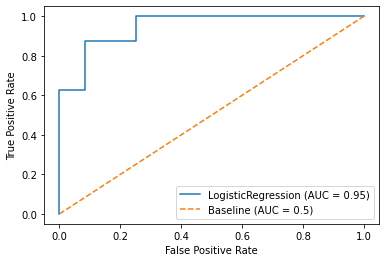

In [132]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Actividad 6

A partir del dataset de supervivencia del titanic, disponible [aquí](data/titanic.csv)
- Utilice los algoritmos de Regresión Logística y el clasificador Ridge para predecir la supervivencia de los pasajeros
- Obtenga y compare las curvas ROC y las medidas AUC asociadas a cada clasificador. ¿Cuál es el mejor clasificador?

In [133]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.